<h2 style="text-align: center;"><b>Домашнее задание 3. Математика для DS.
</b></h2>

В этом домашнем задании мы вспомним немного математики и закрепим PCA.


## Задание 1

1 балл


Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$

Тут надо действовать хитро. По определению взять не получится.

Ответ округлите до десятых.

**Ответ:**

Вычислим производную функции, используя основное логарифмическое тождество $x^{x} = e^{\ln{x}^{x}}$:

$(x^{x})' = (e^{\ln{x}^{x}})' = (e^{x*\ln{x}})' = e^{x\ln{x}}*(x\ln{x})' = x^{x}(\ln{x}+\frac{1}{x}*x) =  x^{x}(\ln{x}+1)$

Теперь посчитаем в точке $x_{0} = e$:

$e^{e}(\ln{e}+1) = e^{e}(1+1) = 2e^{e} \approx 30.3$

## Задание 2

2 балла

Вычислите производную $f(x)=tg(x)⋅ln(cos(x^2)+1)$, в точке $x_0 = 0$

**Ответ:**

$(tg(x)⋅\ln({\cos{x^{2}+1}}))' = tg(x)⋅(\ln({\cos{x^{2}+1}})'+ (tg(x))'⋅\ln({\cos{x^{2}+1}}) = \\ (\ln({\cos{x^{2}+1}})'⋅(\cos{x^{2}+1})'⋅tg(x)+ \ln({\cos{x^{2}+1)}}⋅\frac{1}{\cos{x^2}} = \\ \frac{1}{\cos{x^2}+1}⋅(-2x⋅\sin{x^2})⋅tg(x)+\frac{\ln({\cos{x^{2}+1)}}}{\cos{x^2}} = \\ -2x⋅\sin{x^2}⋅\frac{tg(x)}{\cos{x^2}+1}+\frac{\ln({\cos{x^{2}+1)}}}{\cos{x^2}}$

Теперь посчитаем значение этой производной в точке $x_{0} = 0$:

$0+\frac{\ln({\cos{0}+1)}}{\cos{0}} = \ln{2} \approx 0.69$

## Задание 3 ##

3 балла

Предположим, у вас есть функция, и вы бы хотели знать ее производную, но у вас нет аналитического выражения для нее.
Ваше задание --- написать функцию, которая будет вычислять производную ... кхм функции. Тавтология --- это не очень приятно, но я думаю, что Вы поняли что нужно делать.
Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически.
Попробуйте это сделать приближенно, опираясь на определение производной.

__Напоминание:__
Если вдруг вы не помните определение производной, то вот оно:

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{x-x_0}$$

Если такой предел существует, то и производная существует (и равна этому пределу).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        # BEGIN YOUR CODE
        #Посчитаем предел двухточечным методом численного дифференцирования с шагом (приращением) в обе стороны от точки
        return (func(x + epsilon) - func(x - epsilon))/(2 * epsilon)
        # END YOUR CODE
    return deriv_func

In [ ]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x**4 + 3 * x**2 -10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x)) 
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label="Истинная производная")
    plt.plot(grid, approx_deriv(grid), label="Численное приближение")
    plt.legend()

print(str(right_flag))

True


# Задание 4 - сжатие звука

Σ 12 баллов за все подпункты

Помните как на лекции мы сжимали картинки с помощью PCA? Теперь вам предлагается сделать тоже самое, но со звуком!

In [ ]:
# понадобится для чтения и записи аудио файлов#
from scipy.io import wavfile

# это нужно для проигрывания аудио файлов прямо в колабе
from IPython.display import Audio

from scipy.ndimage import gaussian_filter1d

from sklearn.decomposition import PCA

Считаем wav файл и посмотрим его содержимое

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# ссылка для скачивания файла с гугл диска https://drive.google.com/file/d/1WmORZGngnOn2tMzyAEQOu1gps0ZxsgpB/view?usp=sharing

# Вставьте свой путь к файлу в строчке ниже

samplerate, data = wavfile.read('gdrive/MyDrive/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')


Выведем частоту дискретизации - она тут стандартная для аудио: 44100 герца

Она говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука читайте тут: https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации

In [ ]:
samplerate

44100

Соответсвенно, если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

In [ ]:
# 45 секунд - похоже на правду)
len(data)/samplerate

45.139591836734695

Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

In [ ]:
data.shape

(1990656, 2)

Выведем сигналы в обоих каналах

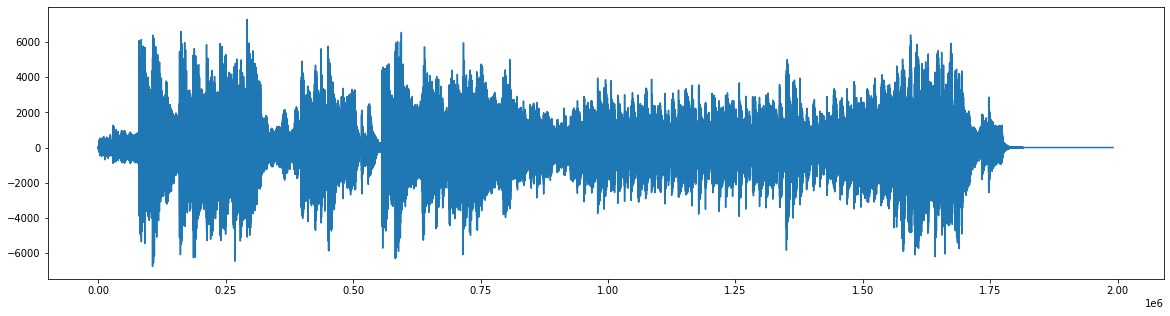

In [ ]:
# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()


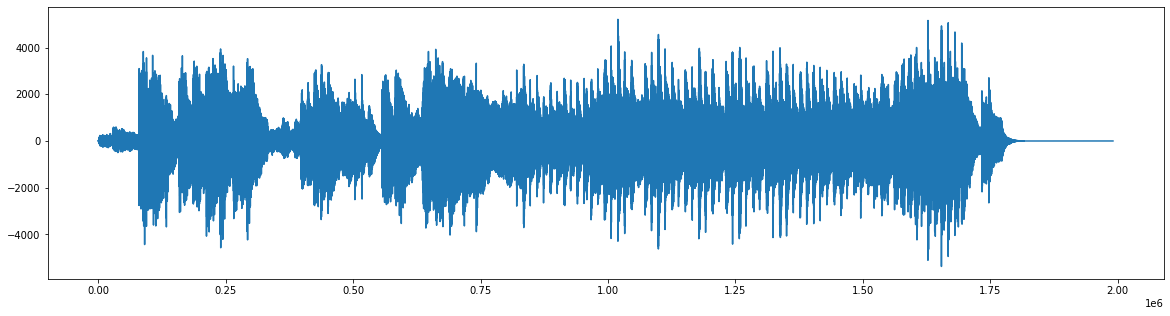

In [ ]:
# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

Усредним каналы, и получим моно звук, с которым будет проще работать

In [ ]:
mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


Давайте послушаем наконец, что же мы будем сжимать

In [ ]:
Audio(mono_sound, rate = samplerate)

Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами. На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки)

In [ ]:
mono_sound_to_cut = mono_sound[:1990000]

In [ ]:
Audio(gaussian_filter1d(mono_sound_to_cut, 2), rate = samplerate)

## Задание 4.1

3 балла

1) Разделите сигнал на равные части - размер частей выбирайте на ваше усмотрение. Рекомендуется 500 или 1000

2) Соберите из них "датасет", который будет представим в виде двуменого массива - "матрицы"

3) Сразу напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал. Проверьте что все работает, путем воспроизведения востановленного сигнала.

In [ ]:
#Разделим сигнал на равные части
sound_to_arr = np.split(mono_sound_to_cut,500)
#Соберем датасет - матрицу
sound_arr = np.array(sound_to_arr)
#Посмотрим размер получившейся матрицы
sound_arr.shape

(500, 3980)

In [ ]:
 #Функция обртного сбора сигнала из матрицы
def Flat_To_Sound(flat_sound,sound_shape,rows,colums):
  """
    flat_sound - входная матрица 
    sound_shape - размер конечного массива
    rows - кол-во строк
    colums - кол-во столбцов
  """
  sound = np.zeros(sound_shape)
  for i in range(0,rows):
    sound[i*colums:(i+1)*colums] = flat_sound[i]
  return sound

In [ ]:
#Проверим как работает функция "обратной сборки"
sound_New = Flat_To_Sound(sound_arr,1990000,500,3980)
Audio(sound_New, rate = samplerate)

## Задание 4.2

3 балла

1) Выполните PCA преобразование, и получите данные, сжатые в пространство меньшей размерности  

2) Постройте сами главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

3) Постройте scatter plot датасета в пространстве первых двух компонент, а третью используйте как цвет


In [ ]:
#Применим PCA для примера на 50 компонент
n_components=50
pca = PCA(n_components)
sound_aft_PCA = pca.fit_transform(sound_arr)
sound_aft_PCA.shape

(500, 50)

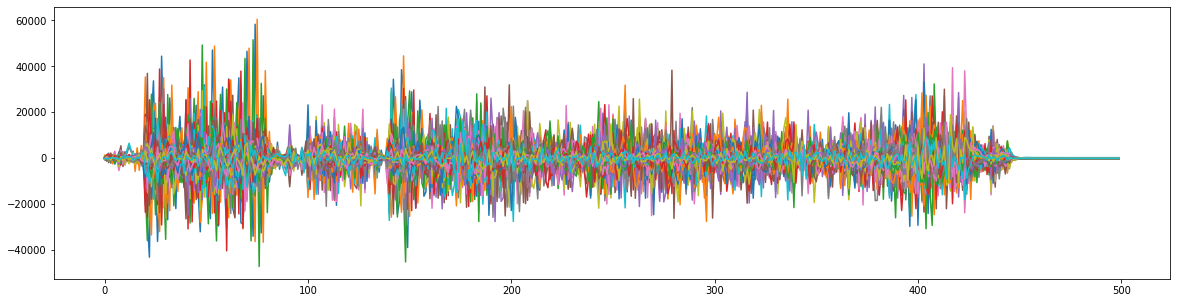

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(sound_aft_PCA)
plt.show()

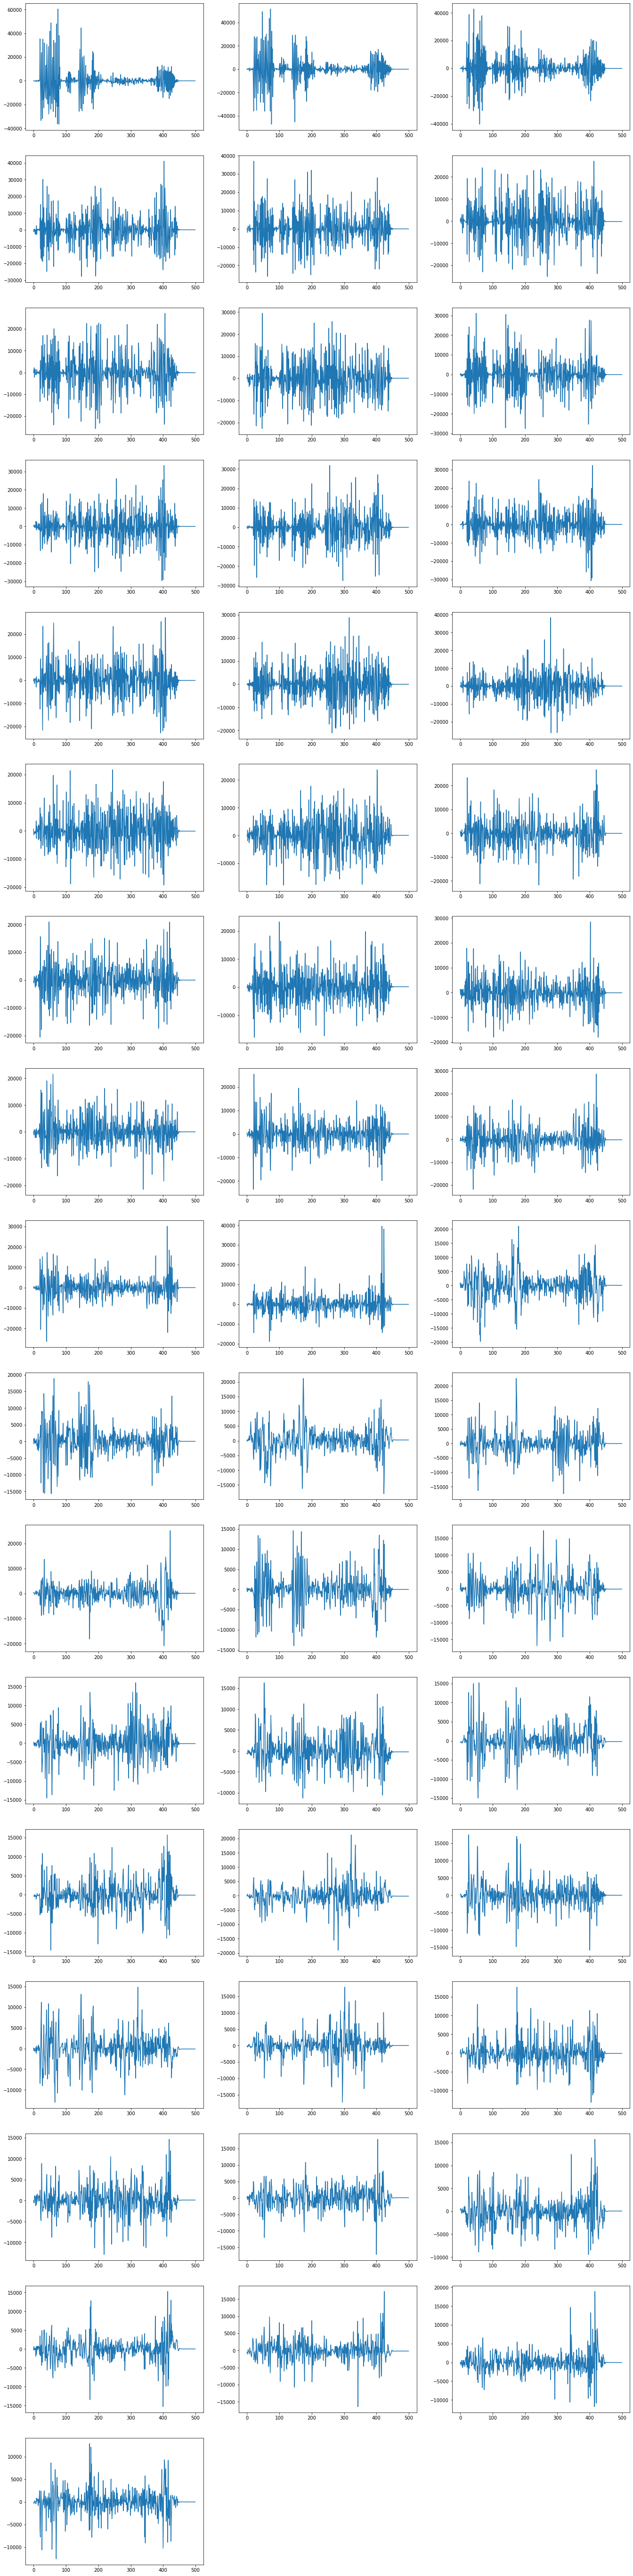

In [ ]:
#Отобразим все компоненты в проекции на 1-ю компоненту в виде серии графиков диаграммы рассеивания
fig = plt.figure(figsize=(23, 100))
rows = int(n_components/3)+1
for i in range(1, n_components):
  ax_i = fig.add_subplot(rows, 3, i)  
  ax_i.plot(sound_aft_PCA[:, i])
  #ax_i.scatter(sound_aft_PCA[:, 0], sound_aft_PCA[:, i], c ='r' ,alpha=0.1)
  #ax_i.set_xlabel ('Проекция 1-й компонеты')
  #ax_i.set_ylabel ('Проекция '+ str(i+1) +' компонеты')
plt.show()

**Заключение:** Из получившихся диаграмм рассеивания, можно увидеть, что, только небольшая  часть компонент имеют достаточно плотное "ядро" рассеивания. Большинство же компенент рессены в вытянутое "облако"

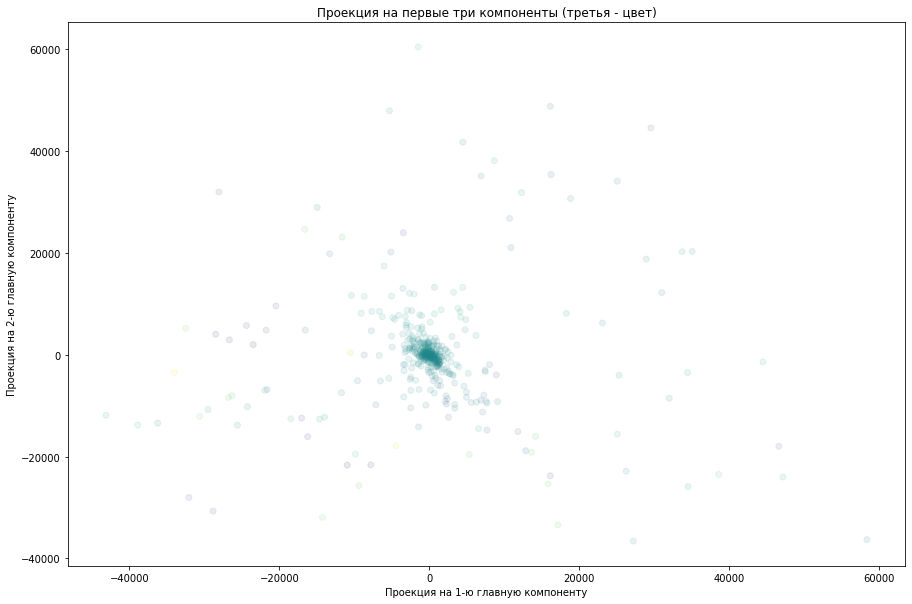

In [ ]:
#Нарисуем scatter plot датасета в пространстве первых 2-х компонент, а третья - цвет
pca_3 = PCA(n_components=3)
Y = pca_3.fit_transform(sound_arr)
plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], c=Y[:, 2], alpha=0.1)
plt.xlabel('Проекция на 1-ю главную компоненту')
plt.ylabel('Проекция на 2-ю главную компоненту')
plt.title('Проекция на первые три компоненты (третья - цвет)')
plt.show()

## Задание 4.3

2 балла

1) Выполните обратное PCA преобразование сжатых данных и получите "матрицу" со сжатым звуком

2) Преобразуйте "матрицу" в сигнал (одномерный массив), и послушайте результат

In [ ]:
#Обратим преобразование назад и востановим массив со звуком из матрицы
sound_invers = pca.inverse_transform(sound_aft_PCA)
sound_New_2 = Flat_To_Sound(sound_invers,1990000,500,3980)
Audio(gaussian_filter1d(sound_New_2,2), rate = samplerate)


Подсказка! попробуйте отфильтровать сигнал с помощью функции gaussian_filter1d из scipy.ndimage. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)

## Задание 4.4

4 балла

1) Оберните получившийся код по сжатию звука в одну или несколько функций

2) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в п. 4.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

In [ ]:
def sound_compression (audio_arr, s_split, n_comp):
    """
    Функция для сжатия звука. 
    :param audio_arr: numpy.ndarray — массив содержащий звук
    :param s_split: int — размер блоков, на которые будет "разбит" массив
    :param n_comp: int — колличество компонентов для PCA преобразования
    :return: сжатый звуковой массив
    """
    cols = int(len(audio_arr)/s_split)
    len_arr = len(audio_arr)
    #Разделим сигнал на равные части
    audio_to_arr = np.split(audio_arr, s_split)
    #Соберем датасет - матрицу
    audio_arr = np.array(audio_to_arr)
    #PCA сжатие и преобразование 
    pca = PCA(n_comp)
    audio_aft_PCA = pca.fit_transform(audio_arr)
    #Обратное преобразование
    audio_invers = pca.inverse_transform(audio_aft_PCA)
    #Вернем используя ранее написаную функцию "сбора" звука из матрицы
    return Flat_To_Sound(audio_invers, len_arr, s_split, cols)

In [ ]:
#Компрессия ~40х, Гаус-фильтрация'
audio_500_100 = sound_compression(mono_sound_to_cut, 500, 100)
Audio(gaussian_filter1d(audio_500_100,2), rate = samplerate)

In [ ]:
#Компрессия ~40х, БЕЗ Гаусс-фильтрации'
audio_500_100 = sound_compression(mono_sound_to_cut, 500, 100)
Audio(audio_500_100, rate = samplerate)

In [ ]:
#Компрессия ~30х, Гаус-фильтрация'
audio_500_130 = sound_compression(mono_sound_to_cut, 500, 130)
Audio(gaussian_filter1d(audio_500_130,2), rate = samplerate)

In [ ]:
#Компрессия ~30х, БЕЗ Гаусс-фильтрации'
audio_500_130 = sound_compression(mono_sound_to_cut, 500, 130)
Audio(audio_500_130, rate = samplerate)

In [ ]:
#Компрессия ~25х, Гаусс-фильтрация'
audio_500_150 = sound_compression(mono_sound_to_cut, 500, 150)
Audio(gaussian_filter1d(audio_500_150,2), rate = samplerate)

In [ ]:
#Компрессия ~25х, БЕЗ Гаусс-фильтрации'
audio_500_150 = sound_compression(mono_sound_to_cut, 500, 150)
Audio(audio_500_150, rate = samplerate)

In [ ]:
#Компрессия ~20х, Гаусс-фильтрация'
audio_500_200 = sound_compression(mono_sound_to_cut, 500, 200)
Audio(gaussian_filter1d(audio_500_200,2), rate = samplerate)

In [ ]:
#Компрессия ~20х, БЕЗ Гаусс-фильтрации'
audio_500_200 = sound_compression(mono_sound_to_cut, 500, 200)
Audio(audio_500_200, rate = samplerate)

In [ ]:
#Компрессия ~16х, Гаусс-фильтрация'
audio_500_250 = sound_compression(mono_sound_to_cut, 500, 250)
Audio(gaussian_filter1d(audio_500_250,2), rate = samplerate)

In [ ]:
#Компрессия ~16х, БЕЗ Гаусс-фильтрации'
audio_500_250 = sound_compression(mono_sound_to_cut, 500, 250)
Audio(audio_500_250, rate = samplerate)

In [ ]:
#Компрессия ~12х, БЕЗ Гаусс-фильтрации'
audio_500_300 = sound_compression(mono_sound_to_cut, 500, 300)
Audio(audio_500_300, rate = samplerate)

In [ ]:
#Компрессия ~12х, Гаусс-фильтрация'
audio_500_300 = sound_compression(mono_sound_to_cut, 500, 300)
Audio(gaussian_filter1d(audio_500_300,2), rate = samplerate)

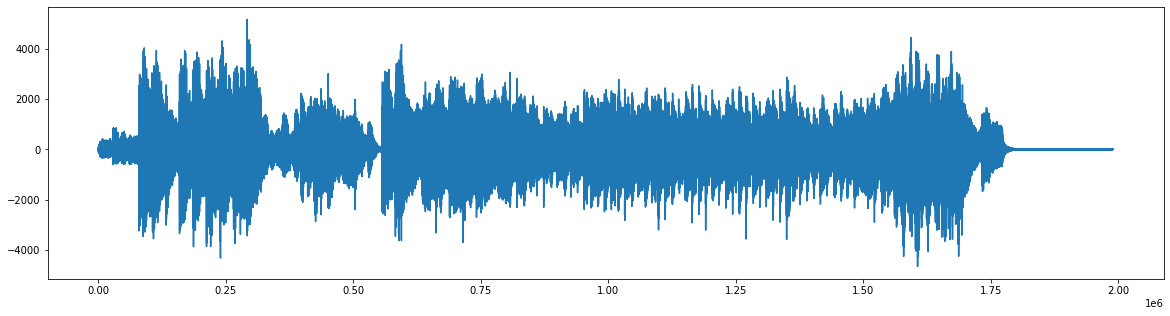

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(audio_500_300)
plt.show()

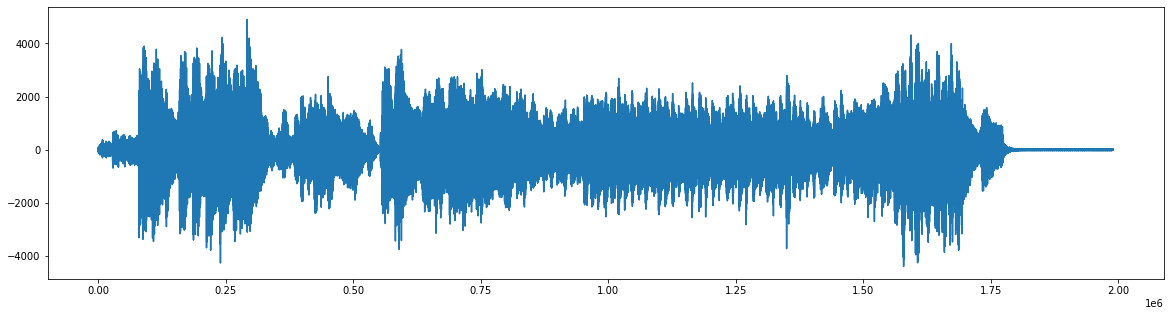

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(audio_500_100)
plt.show()

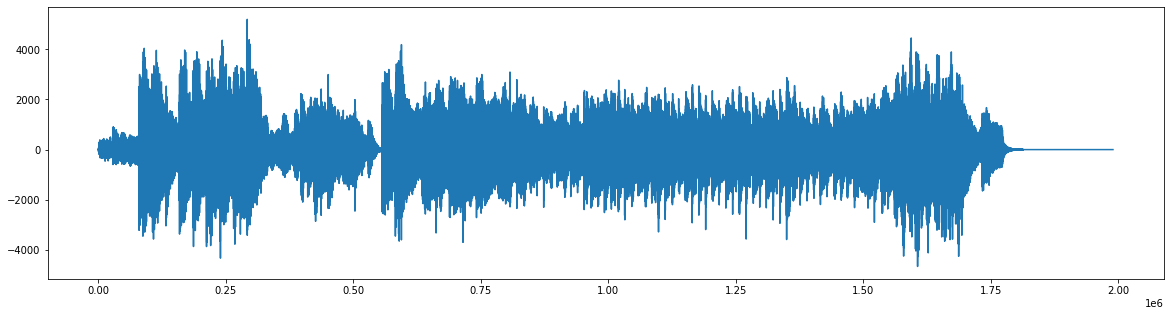

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(mono_sound_to_cut)
plt.show()

**ВЫВОД:**
Как и сказано в задании, качество восприятия звука субьективно, а если к этому добавить вариативность получаемого звука в зависимости от звукового устройства (встроенные колонки, аудио-система, наушники закрытые/открытые проводные/беспроводные и т.д.), то оценить объективно в общем случае крайне непросто. Усреднив ощущения и взяв в "оценщики" ещё одного слушателя, можно сказать, что при сжатии от 25 и выше Гаусс-фильтрация уже не особо помогает, но в целом звук можно считать таковым и даже различать отдельные музыкальные инструменты до сжатия не выше 40.